In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Sesuaikan sama tempat menyimpan data
%cd /content/drive/My Drive/Freelance/Project1/

/content/drive/My Drive/Freelance/Project1


In [ ]:
!pip install swifter
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.6 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=e3577ab65bbebbb948f4392bf630fb4435642020e313e166a89393c10019e1dd
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
import re
import csv
import numpy as np
import Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#baca data
df = pd.read_csv("label.csv", error_bad_lines=False,encoding='ISO-8859-1')
df.head(809)

<ipython-input-5-3ea985d889ce>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("label.csv", error_bad_lines=False,encoding='ISO-8859-1')


,Comment,Rating,Label
0,Sportify is good,5.0,1.0
1,Lagu yg di sukai gabisa diurut? Di playlist jg...,1.0,0.0
2,Bagus,5.0,1.0
3,Ribet,2.0,0.0
4,Oke punya,5.0,1.0
...,...,...,...
804,Mantep,5.0,1.0
805,Lengkap dan fitur nya bagusÂ²,5.0,1.0
806,Lagu bawangi,5.0,1.0
807,"Aplikasi nya bagus dan lagu-lagunya keren"" ban...",NaN,NaN


## Tahap Preprocessing
1. Case Folding
2. Menghilangkan emoji dan simbol
3. Menghilangkan angka
4. Menghapus tanda baca
5. Tokenisasi
6. Normalisasi
7. Stopword

In [ ]:
#proses casefolding
import re
def casefolding(Comment):
  Comment = Comment.lower()
  Comment = Comment.strip(" ")
  return Comment
df['Comment'] = df['Comment'].apply(casefolding)
print(df['Comment'])

0                                       sportify is good
1      lagu yg di sukai gabisa diurut? di playlist jg...
2                                                  bagus
3                                                  ribet
4                                              oke punya
                             ...                        
995                                                   ok
996    muaaaantapb semoga lebih kreatif lagi mengumpu...
997                                   lagu bagusðð
998    suka bangett sma spotify karna dia gak ad ikla...
999                   cukup dengan sporty semua terhibur
Name: Comment, Length: 1000, dtype: object


In [ ]:
#proses menghilangkan simbol dan emoji
def remove_text_special (text):
  text = text.replace('\\t',"").replace('\\n',"").replace('\\u',"").replace('\\',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  return text.replace("http://"," ").replace("https://", " ")
df['Comment'] = df['Comment'].apply(remove_text_special)
print(df['Comment'])

0                                       sportify is good
1      lagu yg di sukai gabisa diurut? di playlist jg...
2                                                  bagus
3                                                  ribet
4                                              oke punya
                             ...                        
995                                                   ok
996    muaaaantapb semoga lebih kreatif lagi mengumpu...
997                                   lagu bagus????????
998    suka bangett sma spotify karna dia gak ad ikla...
999                   cukup dengan sporty semua terhibur
Name: Comment, Length: 1000, dtype: object


In [ ]:
#proses menghilangkan angka
def remove_numbers (text):
  return re.sub(r"\d+", "", text)
df['Comment'] = df['Comment'].apply(remove_numbers)
print(df['Comment'])

0                                       sportify is good
1      lagu yg di sukai gabisa diurut? di playlist jg...
2                                                  bagus
3                                                  ribet
4                                              oke punya
                             ...                        
995                                                   ok
996    muaaaantapb semoga lebih kreatif lagi mengumpu...
997                                   lagu bagus????????
998    suka bangett sma spotify karna dia gak ad ikla...
999                   cukup dengan sporty semua terhibur
Name: Comment, Length: 1000, dtype: object


In [ ]:
from string import punctuation

In [ ]:
def remove_tanda_baca(text):
  text = text.replace(".","")
  text = text.replace(",","")
  text = text.replace("'","")
  text = text.replace('"',"")
  text = text.replace("&","")
  text = text.replace("-","")
  text = text.replace("?","")
  text = text.replace("!","")
  text = text.replace("(","")
  text = text.replace(")","")
  text = text.replace("/","")
  text = text.replace("#","")
  text = text.replace("%","")
  text = text.replace("*","")
  text = text.replace(":","")
  text = text.replace(";","")
  text = text.replace("@","")
  text = text.replace("_","")
  text = text.replace("+","")
  text = text.replace(">","")
  text = text.replace("<","")
  text = text.replace("$","")
  return text

In [ ]:
df['Comment'] = df['Comment'].apply(remove_tanda_baca)

In [ ]:
print(df['Comment'])

0                                       sportify is good
1      lagu yg di sukai gabisa diurut di playlist jg ...
2                                                  bagus
3                                                  ribet
4                                              oke punya
                             ...                        
995                                                   ok
996    muaaaantapb semoga lebih kreatif lagi mengumpu...
997                                           lagu bagus
998    suka bangett sma spotify karna dia gak ad ikla...
999                   cukup dengan sporty semua terhibur
Name: Comment, Length: 1000, dtype: object


In [ ]:
#proses tokenizing
def word_tokenize_wrapper(text):
  return word_tokenize(text)
df['review_token'] = df['Comment'].apply(word_tokenize_wrapper)
print(df['review_token'])

0                                   [sportify, is, good]
1      [lagu, yg, di, sukai, gabisa, diurut, di, play...
2                                                [bagus]
3                                                [ribet]
4                                           [oke, punya]
                             ...                        
995                                                 [ok]
996    [muaaaantapb, semoga, lebih, kreatif, lagi, me...
997                                        [lagu, bagus]
998    [suka, bangett, sma, spotify, karna, dia, gak,...
999             [cukup, dengan, sporty, semua, terhibur]
Name: review_token, Length: 1000, dtype: object


In [ ]:
#Normalisasi
normalize = pd.read_excel("Normalization Data.xlsx")

normalize_word_dict = {}

for index, row in normalize.iterrows():
  if row[0] not in normalize_word_dict:
    normalize_word_dict[row[0]] = row[1]

def normalized_term(comment):
  return [normalize_word_dict[term] if term in normalize_word_dict else term for term in comment]

df['comment_normalize'] = df['review_token'].apply(normalized_term)
df['comment_normalize'].head(20)

0                              [spotify, adalah, bagus]
1     [lagu, yang, di, suka, gabisa, urut, di, playl...
2                                               [bagus]
3                                               [susah]
4                                          [oke, punya]
5     [tampil, logo, acak, di, samping, kiri, tombol...
6                                                    []
7                            [bagus, lagu, enak, semua]
8                                          [sedih, cuk]
9                               [mantap, mantap, betul]
10                                      [keren, banget]
11                             [saya, suka, kamu, saya]
12    [mantap, lebih, bagus, bagus, dari, youtube, m...
13                                              [bagus]
14                              [keren, sukses, selalu]
15             [bagus, banget, dan, lagu, nya, lengkap]
16    [mending, pakai, modifikasi, aja, yang, bajaka...
17                                              

In [ ]:
df['comment_normalize']

0                               [spotify, adalah, bagus]
1      [lagu, yang, di, suka, gabisa, urut, di, playl...
2                                                [bagus]
3                                                [susah]
4                                           [oke, punya]
                             ...                        
995                                                [oke]
996    [mantap, semoga, lebih, kreatif, lagi, mengump...
997                                        [lagu, bagus]
998    [suka, banget, sama, spotify, karena, dia, tid...
999               [cukup, dengan, spotify, semua, hibur]
Name: comment_normalize, Length: 1000, dtype: object

In [ ]:
#Stopword Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
txt_stopwords = stopwords.words('indonesian')

def stopwords_removal(filtering) :
  filtering = [word for word in filtering if word not in txt_stopwords]
  return filtering

df['stopwords_removal'] = df['comment_normalize'].apply(stopwords_removal)
df['stopwords_removal']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                       [spotify, bagus]
1      [lagu, suka, gabisa, urut, playlist, gabisa, u...
2                                                [bagus]
3                                                [susah]
4                                                  [oke]
                             ...                        
995                                                [oke]
996    [mantap, semoga, kreatif, mengumpulkan, lagu, ...
997                                        [lagu, bagus]
998    [suka, banget, spotify, iklan, banget, lagu, nya]
999                                     [spotify, hibur]
Name: stopwords_removal, Length: 1000, dtype: object

In [ ]:
data_stopwords = pd.read_csv("list_stopwords.csv")
print(data_stopwords)


def stopwords_removal2(filter) :
  filter = [word for word in filter if word not in data_stopwords]
  return filter

df['stopwords_removal_final'] = df['stopwords_removal'].apply(stopwords_removal2)
df['stopwords_removal_final']

Empty DataFrame
Columns: [kah, samping, kiri, maju, mundur, orang kedua, youtube, nya, aja, wkwkk, gimana, lihat, duel, boong, ya, coba, anjing, pilihan, sandi, tai, v, cq, fd, h, ax, babu, tombol, kantuk, kntl, sherina, eh, kitaudah, cari, ketemu, sdang, luring, pas, luring.1, bilang, log, in, kembaliterimah, nge, lo, dakwahlbh, klan, detik, tolol, kakak, silah, kn, fasid, solo, loh, bagusbagus, nan, babi, negara, t, o, p, ii, nyacuma, putarpilihdengerinklo, sia, cv, katai, luring.2, log.1, tank, am, radio, simple, sih, daring, blibli, lainnya, keluarga, sim, mantaplahnice, luring.3, garena, garax, barca, yah, loh.1, heeh, rate, si, ini saya, resso, kaya, deh, pdkesmas, woi, kontol, loh.2, interface, gitu, mahasiswa, ...]
Index: []

[0 rows x 298 columns]


0                                       [spotify, bagus]
1                               [lagu, suka, urut, urut]
2                                                [bagus]
3                                                [susah]
4                                                  [oke]
                             ...                        
995                                                [oke]
996    [mantap, semoga, kreatif, mengumpulkan, lagu, ...
997                                        [lagu, bagus]
998         [suka, banget, spotify, iklan, banget, lagu]
999                                     [spotify, hibur]
Name: stopwords_removal_final, Length: 1000, dtype: object

In [ ]:
#proses stem
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import swifter
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def stemming (term):
  return stemmer.stem(term)

In [ ]:
term_dict = {}

In [ ]:
for document in df['stopwords_removal_final']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ''

In [ ]:
print(len(term_dict))
print("-----------------------------")

463
-----------------------------


In [ ]:
for term in term_dict:
  term_dict[term] = stemming(term)
  print(term,":",term_dict[term])

print(term_dict)
print("-----------------------------")

spotify : spotify
bagus : bagus
lagu : lagu
suka : suka
urut : urut
susah : susah
oke : oke
tampil : tampil
logo : logo
acak : acak
putar : putar
enak : enak
sedih : sedih
mantap : mantap
keren : keren
banget : banget
musik : musik
iklan : iklan
sukses : sukses
lengkap : lengkap
mending : mending
pakai : pakai
modifikasi : modifikasi
bajakan : baja
gratis : gratis
bebas : bebas
unduh : unduh
premium : premium
bayar : bayar
jaringan : jaring
jelek : jelek
tolong : tolong
mengesankan : kesan
aplikasi : aplikasi
paksa : paksa
rusak : rusak
bohong : bohong
internet : internet
lamban : lamban
cocok : cocok
teman : teman
begadang : begadang
parah : parah
bintang : bintang
memperbaiki : baik
dengar : dengar
menerus : terus
kesal : kesal
lumayan : lumayan
judul : judul
sesuai : sesuai
list : list
daftar : daftar
perbaikan : baik
pengaturan : atur
kecewa : kecewa
bikin : bikin
akun : akun
gila : gila
kali : kali
data : data
busuk : busuk
modern : modern
koleksi : koleksi
sibuk : sibuk
beli : be

In [ ]:
def get_stemming(document):
  return [term_dict[term] for term in document]

In [ ]:
df['stemming'] = df['stopwords_removal_final'].swifter.apply(get_stemming)

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(df['stemming'])

0                                  [spotify, bagus]
1                          [lagu, suka, urut, urut]
2                                           [bagus]
3                                           [susah]
4                                             [oke]
                           ...                     
995                                           [oke]
996     [mantap, moga, kreatif, kumpul, lagu, lagu]
997                                   [lagu, bagus]
998    [suka, banget, spotify, iklan, banget, lagu]
999                                [spotify, hibur]
Name: stemming, Length: 1000, dtype: object


In [ ]:
df = df.dropna()
df

,Comment,Rating,Label,review_token,comment_normalize,stopwords_removal,stopwords_removal_final,stemming
0,sportify is good,5.0,1.0,"[sportify, is, good]","[spotify, adalah, bagus]","[spotify, bagus]","[spotify, bagus]","[spotify, bagus]"
1,lagu yg di sukai gabisa diurut di playlist jg ...,1.0,0.0,"[lagu, yg, di, sukai, gabisa, diurut, di, play...","[lagu, yang, di, suka, gabisa, urut, di, playl...","[lagu, suka, gabisa, urut, playlist, gabisa, u...","[lagu, suka, urut, urut]","[lagu, suka, urut, urut]"
2,bagus,5.0,1.0,[bagus],[bagus],[bagus],[bagus],[bagus]
3,ribet,2.0,0.0,[ribet],[susah],[susah],[susah],[susah]
4,oke punya,5.0,1.0,"[oke, punya]","[oke, punya]",[oke],[oke],[oke]
...,...,...,...,...,...,...,...,...
995,ok,5.0,1.0,[ok],[oke],[oke],[oke],[oke]
996,muaaaantapb semoga lebih kreatif lagi mengumpu...,5.0,1.0,"[muaaaantapb, semoga, lebih, kreatif, lagi, me...","[mantap, semoga, lebih, kreatif, lagi, mengump...","[mantap, semoga, kreatif, mengumpulkan, lagu, ...","[mantap, semoga, kreatif, mengumpulkan, lagu, ...","[mantap, moga, kreatif, kumpul, lagu, lagu]"
997,lagu bagus,5.0,1.0,"[lagu, bagus]","[lagu, bagus]","[lagu, bagus]","[lagu, bagus]","[lagu, bagus]"
998,suka bangett sma spotify karna dia gak ad ikla...,5.0,1.0,"[suka, bangett, sma, spotify, karna, dia, gak,...","[suka, banget, sama, spotify, karena, dia, tid...","[suka, banget, spotify, iklan, banget, lagu, nya]","[suka, banget, spotify, iklan, banget, lagu]","[suka, banget, spotify, iklan, banget, lagu]"


In [ ]:
df=df.reset_index()

In [ ]:
from google.colab import files
df.to_csv('hasil_stemming.csv')

## Splitting Data 80% Training dan 20% Testing

In [ ]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
X = df[['Comment', 'Rating', 'stemming']]
y = df['Label']
def split_train_test(data_df, test_size=0.2, shuffle_state=True): # 80% Training & 20% Testing. Ubah nilai pada variable test_size jika ingin skala yang lain
    X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                        y,
                                                        shuffle=shuffle_state,
                                                        test_size=test_size,
                                                        stratify=y,
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df)

Value counts for Train sentiments
1.0    604
0.0    194
Name: Label, dtype: int64
Value counts for Test sentiments
1.0    151
0.0     49
Name: Label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index                                    Comment  Rating  \
0    540                                      bagus     5.0   
1    829  lima bintang biaya langanan terlalu mahal     5.0   
2    532                        sipp mantep sy suka     3.0   
3    581                                suka baguss     5.0   
4    549                                 indah nian     5.0   

                  stemming  
0                  [bagus]  
1  [bintang, biaya, mahal]  
2      [sip, mantap, suka]  
3            [suka, bagus]  
4                  [indah]  


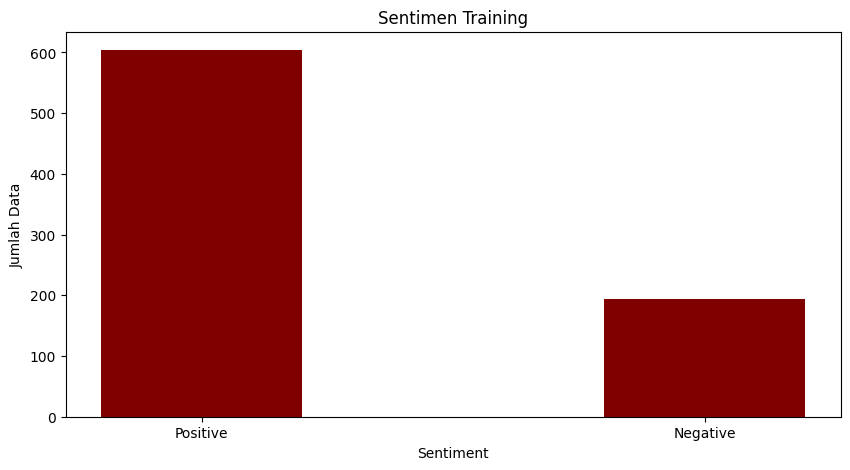

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 1 = Positive, 0 = Negative
dataPlot = {'Positive':Y_train['Label'].value_counts()[1], 'Negative':Y_train['Label'].value_counts()[0] }
labelx = list(dataPlot.keys())
values = list(dataPlot.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labelx, values, color ='maroon',
        width = 0.4)

plt.ylabel("Jumlah Data")
plt.xlabel("Sentiment")
plt.title("Sentimen Training")
plt.show()

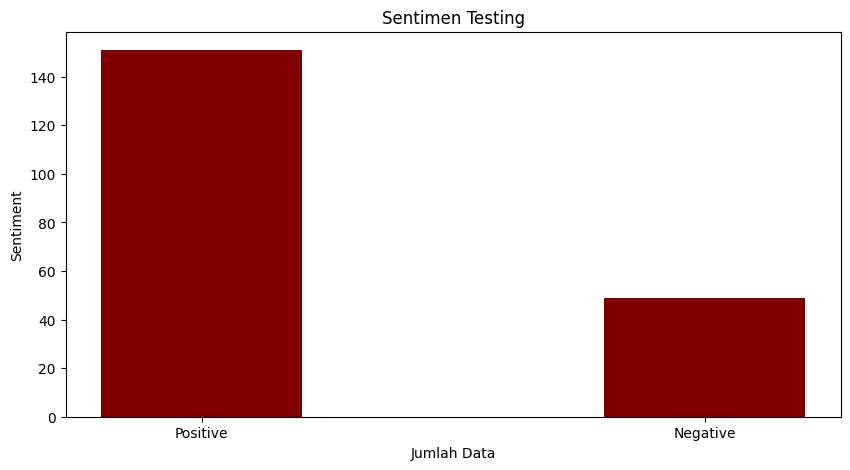

In [ ]:
# 1 = Positive, 0 = Negative
dataPlot = {'Positive':Y_test['Label'].value_counts()[1], 'Negative':Y_test['Label'].value_counts()[0]}
labelx = list(dataPlot.keys())
values = list(dataPlot.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labelx, values, color ='maroon',
        width = 0.4)

plt.xlabel("Jumlah Data")
plt.ylabel("Sentiment")
plt.title("Sentimen Testing")
plt.show()

## Menerapkan Word Embedding : Word2Vex

Refrensi:
https://medium.com/swlh/sentiment-classification-using-word-embeddings-word2vec-aedf28fbb8ca

In [ ]:
from gensim.models import Word2Vec
import time

OUTPUT_FOLDER = '/content/drive/My Drive/Freelance/Project1/' #Untuk menyimpan file model, sesuaikan dengan drive sendiri.
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

word2vec_model_file = OUTPUT_FOLDER + 'word2vec_' + str(size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(df['stemming']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, vector_size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save(word2vec_model_file)

Time taken to train word2vec model: 0.1153874397277832


In [ ]:
X_train['stemming']

0                                                [bagus]
1                                [bintang, biaya, mahal]
2                                    [sip, mantap, suka]
3                                          [suka, bagus]
4                                                [indah]
                             ...                        
793                                              [bagus]
794                                                [oke]
795    [bagus, cuman, kadang, ganggu, susah, atur, un...
796                                                   []
797                                             [mantap]
Name: stemming, Length: 798, dtype: object

In [ ]:
import numpy as np
# Load the model from the model file
sg_w2v_model = Word2Vec.load(word2vec_model_file)
# # Unique ID of the word
# print("Index of the word 'bagus':")
# # print(sg_w2v_model.wv.vocab["bagus"].index)
# # Total number of the words
# print(len(sg_w2v_model.wv.vocab))
# # Print the size of the word2vec vector for one word
# print("Length of the vector generated for a word")
# print(len(sg_w2v_model['bagus']))
# # Get the mean for the vectors for an example review
# print("Print Vector Kata di index ke-0:")
# print(np.mean([sg_w2v_model[token] for token in df['stemming'][2]], axis=0))

'''
print("\n Print Semua Kata")
for i in range (len(df['stemming'])):
  print(np.max([sg_w2v_model[token] for token in df['stemming'][i]], axis=0))'''

'\nprint("\n Print Semua Kata")\nfor i in range (len(df[\'stemming\'])):\n  print(np.max([sg_w2v_model[token] for token in df[\'stemming\'][i]], axis=0))'

In [ ]:
#Vector Setiap Kata
stem = []
for i in range (len(X_train['stemming'])):
  for y in range(len(X_train['stemming'][i])):
    stem.append(X_train['stemming'][i][y])

In [ ]:
#Vector Setiap Kata
v = []
for i in stem:
  vector_w2v = np.mean(sg_w2v_model.wv.get_vector(i))
  v.append(vector_w2v)
print(v)

[-9.251535e-06, 1.0761675e-06, 5.077909e-06, -1.5870077e-05, -5.9316626e-06, -4.007472e-06, -2.6668511e-05, -2.6668511e-05, -9.251535e-06, 1.1457779e-05, -1.4641678e-05, -1.80459e-05, -9.251535e-06, -9.251535e-06, -5.5941466e-05, -9.251535e-06, -3.2769018e-05, -1.2131191e-05, -2.5646006e-05, 1.2092151e-05, -3.8469076e-05, -3.2769018e-05, -3.1368694e-05, -3.2769018e-05, -9.251535e-06, -1.7261982e-05, 1.2118797e-06, -1.0127033e-05, -1.0259311e-05, -1.2131191e-05, 4.456284e-05, 1.9265877e-05, -9.251535e-06, -4.217744e-05, -1.2131191e-05, -4.408139e-06, -2.6668511e-05, 1.6763372e-05, -5.5941466e-05, -3.1368694e-05, -3.2769018e-05, -4.007472e-06, -1.7261982e-05, 1.2118797e-06, -2.879899e-06, -3.2888667e-05, 2.5509138e-05, -5.9316626e-06, 1.9265877e-05, 1.6763372e-05, -9.251535e-06, -9.251535e-06, -5.9316626e-06, 1.9265877e-05, 1.6763372e-05, -9.251535e-06, -4.408139e-06, 1.1311719e-05, -1.7402821e-05, -3.2769018e-05, 3.5447185e-05, 2.3989203e-06, 6.6095217e-06, -1.9034054e-05, 3.3256933e-05

In [ ]:
vector_w2v = pd.DataFrame(list(zip(stem, v)), columns =['kata', 'vector'])

vector_w2v

,kata,vector
0,bagus,-0.000009
1,bintang,0.000001
2,biaya,0.000005
3,mahal,-0.000016
4,sip,-0.000006
...,...,...
2313,susah,-0.000046
2314,atur,-0.000029
2315,unduh,-0.000026
2316,spotify,-0.000031


In [ ]:
vector_w2v.to_csv('/content/drive/My Drive/Freelance/Project1/w2v_files.csv')

In [ ]:
word2vec_filename = OUTPUT_FOLDER + 'vector_w2v.csv'
vector_w2v_file = vector_w2v.to_csv(word2vec_filename, index = False)

with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([sg_w2v_model.wv.get_vector(token) for token in row['stemming']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Menerapkan model Support Vector Machine (SVM) untuk Word2vec

In [ ]:
Y_train

,index,Label
0,540,1.0
1,829,1.0
2,532,0.0
3,581,1.0
4,549,1.0
...,...,...
793,72,1.0
794,826,1.0
795,154,1.0
796,990,1.0


In [ ]:
Y_train.shape

(798, 2)

In [ ]:
word2vec_df = pd.read_csv(word2vec_filename)
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000894,0.000987,0.000819,0.001739,-0.001171,-0.000094,0.000951,0.001539,-0.000856,0.000108,...,-0.000308,-0.000360,0.001500,0.000141,0.002143,-0.000115,-0.001560,-0.000140,0.000466,-0.000190
1,0.000370,0.000254,0.000085,-0.000256,-0.000098,0.000476,0.000056,0.000137,-0.000333,0.000487,...,-0.000043,-0.000996,0.000295,-0.000780,0.000366,0.000590,-0.000103,-0.000268,0.000099,0.000047
2,0.000597,-0.000278,0.000144,0.000639,-0.000777,-0.000324,-0.000115,0.000656,-0.000585,0.000986,...,0.000427,-0.000602,0.000233,-0.000403,0.000231,0.000376,-0.000397,-0.000750,-0.000226,-0.000459
3,0.001133,0.000477,0.000103,0.001282,-0.001125,-0.000113,0.000843,0.001482,-0.000961,0.000687,...,0.000095,-0.001154,0.001646,0.000239,0.001313,0.000258,-0.001217,-0.000807,0.000034,-0.000830
4,0.000518,0.000674,0.000223,-0.000198,0.000150,0.000941,0.000009,0.000129,-0.000484,-0.000282,...,-0.000131,-0.000053,0.000597,0.000659,-0.000805,0.000463,-0.000224,0.000393,0.000981,-0.000565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0.000894,0.000987,0.000819,0.001739,-0.001171,-0.000094,0.000951,0.001539,-0.000856,0.000108,...,-0.000308,-0.000360,0.001500,0.000141,0.002143,-0.000115,-0.001560,-0.000140,0.000466,-0.000190
794,0.000142,-0.000698,-0.000620,0.000269,-0.000998,0.000665,0.000791,0.001031,-0.001049,-0.000374,...,0.000541,-0.000247,0.000946,0.000684,0.000191,0.000601,-0.000860,-0.000376,0.000818,-0.000193
795,0.001176,0.001036,0.000297,0.001167,-0.000397,0.000555,0.000711,0.000696,-0.000475,0.000845,...,0.000124,-0.001375,0.001399,-0.000550,0.001393,0.000854,-0.001249,-0.000734,-0.000665,-0.000608
796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
word2vec_df.shape

(798, 1000)

In [ ]:
import time
from sklearn import svm
# Load from the filename
word2vec_df = pd.read_csv(word2vec_filename)
#Initialize the model https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5
clf_decision_word2vec = svm.SVC()

start_time = time.time()
# Fit the model
clf_decision_word2vec.fit(word2vec_df, Y_train['Label'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

Time taken to fit the model with word2vec vectors: 0.32813334465026855


## Evaluasi model SVM untuk Word2vec

In [ ]:
Y_test['Label']

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
195    1.0
196    1.0
197    0.0
198    1.0
199    0.0
Name: Label, Length: 200, dtype: float64

In [ ]:
X_test

,index,Comment,Rating,stemming
0,685,bagus sekali,5.0,[bagus]
1,665,sekarang kalo mau beli premium susahnya minta ...,1.0,"[beli, premium, susah, ampun, jaring, hubung, ..."
2,759,bagus gt aja,5.0,[bagus]
3,928,bagus,5.0,[bagus]
4,996,suka bangett sma spotify karna dia gak ad ikla...,5.0,"[suka, banget, spotify, iklan, banget, lagu]"
...,...,...,...,...
195,501,bangus,5.0,[bagus]
196,880,nice,5.0,[bagus]
197,595,jelek banget enda bisa di download lagu nya,1.0,"[jelek, banget, unduh, lagu]"
198,804,mantep,5.0,[mantap]


In [ ]:
from sklearn.metrics import classification_report
test_features_word2vec = []
for index, row in X_test.iterrows():
    model_vector = np.mean([sg_w2v_model.wv.get_vector(token) for token in row['stemming']], axis=0)
    if model_vector.dtype == 'float32':
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(1000)]))
test_predictions_word2vec = clf_decision_word2vec.predict(test_features_word2vec)
print(classification_report(Y_test['Label'],test_predictions_word2vec))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.96      0.45      0.61        49
         1.0       0.85      0.99      0.91       151

    accuracy                           0.86       200
   macro avg       0.90      0.72      0.76       200
weighted avg       0.87      0.86      0.84       200



In [ ]:
pd.DataFrame(test_features_word2vec)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000894,0.000987,0.000819,0.001739,-0.001171,-0.000094,0.000951,0.001539,-0.000856,0.000108,...,-0.000308,-0.000360,0.001500,0.000141,0.002143,-0.000115,-0.001560,-0.000140,0.000466,-0.000190
1,0.000975,0.001269,0.000519,0.000700,-0.000330,0.000789,0.000634,0.000757,-0.000363,0.000422,...,0.000519,-0.001159,0.001328,-0.001046,0.001651,0.000907,-0.000647,-0.000826,-0.000150,-0.000621
2,0.000894,0.000987,0.000819,0.001739,-0.001171,-0.000094,0.000951,0.001539,-0.000856,0.000108,...,-0.000308,-0.000360,0.001500,0.000141,0.002143,-0.000115,-0.001560,-0.000140,0.000466,-0.000190
3,0.000894,0.000987,0.000819,0.001739,-0.001171,-0.000094,0.000951,0.001539,-0.000856,0.000108,...,-0.000308,-0.000360,0.001500,0.000141,0.002143,-0.000115,-0.001560,-0.000140,0.000466,-0.000190
4,0.001881,0.001546,0.000295,0.001257,-0.000704,0.000679,0.000437,0.001283,-0.000466,0.000839,...,0.001059,-0.002586,0.001663,-0.001307,0.002068,0.001088,-0.001586,-0.001067,-0.001005,-0.001383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000894,0.000987,0.000819,0.001739,-0.001171,-0.000094,0.000951,0.001539,-0.000856,0.000108,...,-0.000308,-0.000360,0.001500,0.000141,0.002143,-0.000115,-0.001560,-0.000140,0.000466,-0.000190
196,0.000894,0.000987,0.000819,0.001739,-0.001171,-0.000094,0.000951,0.001539,-0.000856,0.000108,...,-0.000308,-0.000360,0.001500,0.000141,0.002143,-0.000115,-0.001560,-0.000140,0.000466,-0.000190
197,0.001919,0.001844,0.000904,0.001113,-0.000317,0.000577,0.000356,0.000877,-0.000880,0.000616,...,0.000627,-0.002062,0.001521,-0.000798,0.001832,0.000606,-0.001637,-0.001454,-0.000847,-0.000734
198,0.000387,-0.000650,0.000606,0.000865,-0.000289,-0.000325,-0.000926,0.000573,0.000249,0.000942,...,0.001045,0.000428,-0.000527,-0.000427,-0.000197,0.000399,0.000024,-0.000959,0.000159,0.000884


In [ ]:
print(test_features_word2vec)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
test_predictions_word2vec

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

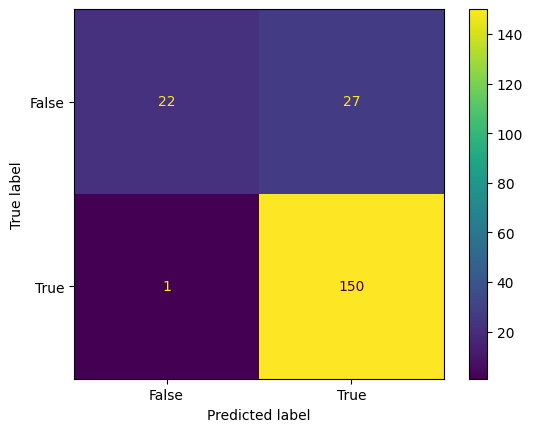

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(Y_test['Label'],test_predictions_word2vec)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Metode FASTTEXT

referensi :
https://towardsdatascience.com/fasttext-sentiment-analysis-for-tweets-a-straightforward-guide-9a8c070449a2

https://thinkinfi.com/fasttext-word-embeddings-python-implementation/

In [ ]:
from gensim.models.fasttext import FastText

# Defining values for parameters
embedding_size = 100
window_size = 3
min_word = 1
down_sampling = 1e-2


fast_Text_model = FastText(stemmed_tokens,
                      vector_size=embedding_size,
                      window=window_size,#0.4142646789550781
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 3,
                      sg=1,
                      epochs=3)

In [ ]:
fastText_filename = OUTPUT_FOLDER + 'ft_model_yelp' + str(size) + '.model'
# Save fastText gensim model
start_time = time.time()
fast_Text_model.save(fastText_filename)
# Load saved gensim fastText model
fast_Text_model = FastText.load(fastText_filename)

print("Time taken to train FastText model: " + str(time.time() - start_time))
fast_Text_model.wv['bagus']

Time taken to train FastText model: 18.800880193710327


array([-0.15952127, -0.02653222,  0.03170672,  0.01154726,  0.09065352,
        0.00714323,  0.02698475,  0.01498515,  0.16968271,  0.04636198,
       -0.1159271 , -0.0207216 , -0.01408854, -0.0286066 , -0.13059539,
       -0.1881795 ,  0.12359975, -0.19452332, -0.2534159 , -0.1487716 ,
        0.05059602, -0.22328506, -0.02955918,  0.23188068, -0.13793872,
       -0.08426095,  0.07122903,  0.054538  , -0.01724042,  0.13298374,
        0.09398329, -0.08530252,  0.10722957, -0.14843085, -0.03740587,
        0.046239  ,  0.1076348 ,  0.269478  ,  0.04385572, -0.05518953,
       -0.02711825, -0.21460144, -0.09345887,  0.09192842, -0.27245262,
        0.02569223,  0.03585061, -0.23468526, -0.12836875, -0.03491278,
       -0.0166771 , -0.08316918, -0.13148381,  0.04593752,  0.03070997,
       -0.26298392,  0.01134436,  0.11844916,  0.09553174,  0.11603358,
        0.17126873, -0.01240757, -0.03024507,  0.04922475, -0.14302902,
        0.08874437,  0.12441111,  0.01127985,  0.17030028,  0.08

In [ ]:
for i in range (len(X_train['stemming'])):
  print(np.mean([fast_Text_model.wv[token] for token in X_train['stemming'][i]], axis=0))

[-0.15952127 -0.02653222  0.03170672  0.01154726  0.09065352  0.00714323
  0.02698475  0.01498515  0.16968271  0.04636198 -0.1159271  -0.0207216
 -0.01408854 -0.0286066  -0.13059539 -0.1881795   0.12359975 -0.19452332
 -0.2534159  -0.1487716   0.05059602 -0.22328506 -0.02955918  0.23188068
 -0.13793872 -0.08426095  0.07122903  0.054538   -0.01724042  0.13298374
  0.09398329 -0.08530252  0.10722957 -0.14843085 -0.03740587  0.046239
  0.1076348   0.269478    0.04385572 -0.05518953 -0.02711825 -0.21460144
 -0.09345887  0.09192842 -0.27245262  0.02569223  0.03585061 -0.23468526
 -0.12836875 -0.03491278 -0.0166771  -0.08316918 -0.13148381  0.04593752
  0.03070997 -0.26298392  0.01134436  0.11844916  0.09553174  0.11603358
  0.17126873 -0.01240757 -0.03024507  0.04922475 -0.14302902  0.08874437
  0.12441111  0.01127985  0.17030028  0.08160422  0.12344563  0.21204309
  0.06349085  0.01253415  0.04815374  0.06738056  0.12610732 -0.1488019
  0.03078686  0.14114666  0.14918002  0.04693018 -0.036

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
 -0.01408854 -0.0286066  -0.13059539 -0.1881795   0.12359975 -0.19452332
 -0.2534159  -0.1487716   0.05059602 -0.22328506 -0.02955918  0.23188068
 -0.13793872 -0.08426095  0.07122903  0.054538   -0.01724042  0.13298374
  0.09398329 -0.08530252  0.10722957 -0.14843085 -0.03740587  0.046239
  0.1076348   0.269478    0.04385572 -0.05518953 -0.02711825 -0.21460144
 -0.09345887  0.09192842 -0.27245262  0.02569223  0.03585061 -0.23468526
 -0.12836875 -0.03491278 -0.0166771  -0.08316918 -0.13148381  0.04593752
  0.03070997 -0.26298392  0.01134436  0.11844916  0.09553174  0.11603358
  0.17126873 -0.01240757 -0.03024507  0.04922475 -0.14302902  0.08874437
  0.12441111  0.01127985  0.17030028  0.08160422  0.12344563  0.21204309
  0.06349085  0.01253415  0.04815374  0.06738056  0.12610732 -0.1488019
  0.03078686  0.14114666  0.14918002  0.04693018 -0.03696435 -0.07662198
  0.00951777 -0.00762396  0.08861426  0.07151064 -0.0327022  -0.01474532
 -0

In [ ]:
#Vector Setiap Kata
stem = []
for i in range (len(X_train['stemming'])):
  for y in range(len(X_train['stemming'][i])):
    stem.append(X_train['stemming'][i][y])


In [ ]:
#Vector Setiap Kata
v = []
for i in stem:
  vector_ft = np.mean(fast_Text_model.wv.get_vector(i))
  v.append(vector_ft)
print(v)

[-0.003606066, -0.0032474706, -0.0007715359, -0.0011965224, -0.000437994, -0.002145619, -0.0035938418, -0.0035938418, -0.003606066, -0.0006443081, -0.0014054985, -0.00041707323, -0.003606066, -0.003606066, -0.003924491, -0.003606066, -0.004028331, -0.0039687864, -0.002525413, -0.0017164726, -0.0037283879, -0.004028331, -0.004757301, -0.004028331, -0.003606066, -0.004273507, -0.0038024504, -0.0011263449, -0.0006710942, -0.0039687864, -0.001551263, -0.0012663433, -0.003606066, -0.0016188303, -0.0039687864, -0.0018929201, -0.0035938418, -0.0021608267, -0.003924491, -0.004757301, -0.004028331, -0.002145619, -0.004273507, -0.0038024504, -0.001142234, -0.0015979749, -0.0008885852, -0.000437994, -0.0012663433, -0.0021608267, -0.003606066, -0.003606066, -0.000437994, -0.0012663433, -0.0021608267, -0.003606066, -0.0018929201, -0.00093680003, -0.00046485488, -0.004028331, -0.0022208965, -0.0010091098, -0.00086967065, -0.0007648194, -0.0014421752, -0.004028331, -0.0021608267, -0.0011613942, -0.00

In [ ]:
vector_ft = pd.DataFrame(list(zip(stem, v)), columns =['kata', 'vector'])

vector_ft

,kata,vector
0,bagus,-0.003606
1,bintang,-0.003247
2,biaya,-0.000772
3,mahal,-0.001197
4,sip,-0.000438
...,...,...
2313,susah,-0.002501
2314,atur,-0.001147
2315,unduh,-0.002525
2316,spotify,-0.004757


In [ ]:
vector_ft.to_csv('/content/drive/MyDrive/Freelance/Project1/vector_ft.csv')

In [ ]:
#Vector Setiap Kata
for i in stem:
  print(np.mean(fast_Text_model.wv[i]))

-0.003606066
-0.0032474706
-0.0007715359
-0.0011965224
-0.000437994
-0.002145619
-0.0035938418
-0.0035938418
-0.003606066
-0.0006443081
-0.0014054985
-0.00041707323
-0.003606066
-0.003606066
-0.003924491
-0.003606066
-0.004028331
-0.0039687864
-0.002525413
-0.0017164726
-0.0037283879
-0.004028331
-0.004757301
-0.004028331
-0.003606066
-0.004273507
-0.0038024504
-0.0011263449
-0.0006710942
-0.0039687864
-0.001551263
-0.0012663433
-0.003606066
-0.0016188303
-0.0039687864
-0.0018929201
-0.0035938418
-0.0021608267
-0.003924491
-0.004757301
-0.004028331
-0.002145619
-0.004273507
-0.0038024504
-0.001142234
-0.0015979749
-0.0008885852
-0.000437994
-0.0012663433
-0.0021608267
-0.003606066
-0.003606066
-0.000437994
-0.0012663433
-0.0021608267
-0.003606066
-0.0018929201
-0.00093680003
-0.00046485488
-0.004028331
-0.0022208965
-0.0010091098
-0.00086967065
-0.0007648194
-0.0014421752
-0.004028331
-0.0021608267
-0.0011613942
-0.004757301
-0.0037283879
-0.0039687864
-0.0017164726
-0.0039687864
-0.00

In [ ]:
# with open(fastText_filename, 'w+') as fastText_file:
#     for index, row in X_train.iterrows():
#         model_vector = (np.mean([fast_Text_model[token] for token in row['stemming']], axis=0)).tolist()
#         if index == 0:
#             header = ",".join(str(ele) for ele in range(1000))
#             fastText_file.write(header)
#             fastText_file.write("\n")
#         # Check if the line exists else it is vector of zeros
#         if type(model_vector) is list:
#             line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
#         else:
#             line1 = ",".join([str(0) for i in range(1000)])
#         fastText_file.write(line1)
#         fastText_file.write('\n')

fastText_filename = OUTPUT_FOLDER + 'vector_ft.csv'
vector_ft_file = vector_ft.to_csv(fastText_filename, index = False)

with open(fastText_filename, 'w+') as fastText_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([fast_Text_model.wv.get_vector(token) for token in row['stemming']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            fastText_file.write(header)
            fastText_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        fastText_file.write(line1)
        fastText_file.write('\n')

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
fastText_df = pd.read_csv(fastText_filename)
fastText_df = fastText_df.dropna(axis=1)
fastText_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.159521,-0.026532,0.031707,0.011547,0.090654,0.007143,0.026985,0.014985,0.169683,0.046362,...,-0.048574,0.133347,-0.094394,-0.039847,-0.235269,0.071696,-0.050716,-0.050939,-0.054100,-0.080727
1,-0.080799,-0.013812,0.015720,0.006168,0.043984,0.004923,0.014042,0.007174,0.084201,0.022073,...,-0.021880,0.065510,-0.046252,-0.020704,-0.116539,0.036246,-0.025458,-0.024433,-0.026330,-0.038593
2,-0.098638,-0.015437,0.018300,0.006787,0.053907,0.003613,0.017013,0.008079,0.102643,0.027117,...,-0.027361,0.081065,-0.056615,-0.026344,-0.142281,0.041321,-0.029521,-0.031435,-0.030906,-0.049597
3,-0.162122,-0.026209,0.032226,0.010300,0.089313,0.007764,0.027712,0.014934,0.170547,0.045056,...,-0.047918,0.133561,-0.093664,-0.041493,-0.236426,0.069598,-0.050521,-0.051321,-0.052841,-0.082746
4,-0.037850,-0.005511,0.006596,0.005195,0.024630,0.001911,0.006419,0.002619,0.041441,0.009722,...,-0.008933,0.027801,-0.022101,-0.010966,-0.056266,0.014637,-0.010769,-0.013298,-0.014222,-0.016792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,-0.159521,-0.026532,0.031707,0.011547,0.090654,0.007143,0.026985,0.014985,0.169683,0.046362,...,-0.048574,0.133347,-0.094394,-0.039847,-0.235269,0.071696,-0.050716,-0.050939,-0.054100,-0.080727
794,-0.033049,-0.001442,0.010077,0.002171,0.016147,-0.003696,0.005500,0.006507,0.038126,0.007428,...,-0.012018,0.028393,-0.023679,-0.009155,-0.052707,0.014158,-0.014553,-0.014848,-0.012794,-0.017189
795,-0.123534,-0.020358,0.024660,0.009484,0.067682,0.005412,0.021202,0.011932,0.128184,0.034536,...,-0.036196,0.100123,-0.070308,-0.032726,-0.178091,0.054112,-0.037117,-0.037402,-0.040830,-0.061582
796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
Y_train['Label']

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
793    1.0
794    1.0
795    1.0
796    1.0
797    1.0
Name: Label, Length: 798, dtype: float64

In [ ]:
from sklearn.metrics import classification_report
from sklearn import svm
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf_decision_fastText = svm.SVC()
clf = GridSearchCV(clf_decision_fastText, parameters)
clf.fit(fastText_df, Y_train['Label'])

print("Time taken to fit the model with fastText vectors: " + str(time.time() - start_time))

test_features_fastText = []
for index, row in X_test.iterrows():
    model_vector = np.mean([fast_Text_model.wv.get_vector(token) for token in row['stemming']], axis=0)
    if  model_vector.dtype == 'float32':
        test_features_fastText.append(model_vector)
    else:
        test_features_fastText.append(np.array([0 for i in range(100)]))

test_predictions_fastText = clf.predict(test_features_fastText)
print(classification_report(Y_test['Label'],test_predictions_fastText))

Time taken to fit the model with fastText vectors: 29.189976692199707
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        49
         1.0       0.76      1.00      0.86       151

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. U

In [ ]:
print(test_features_fastText)

[array([-0.15952127, -0.02653222,  0.03170672,  0.01154726,  0.09065352,
        0.00714323,  0.02698475,  0.01498515,  0.16968271,  0.04636198,
       -0.1159271 , -0.0207216 , -0.01408854, -0.0286066 , -0.13059539,
       -0.1881795 ,  0.12359975, -0.19452332, -0.2534159 , -0.1487716 ,
        0.05059602, -0.22328506, -0.02955918,  0.23188068, -0.13793872,
       -0.08426095,  0.07122903,  0.054538  , -0.01724042,  0.13298374,
        0.09398329, -0.08530252,  0.10722957, -0.14843085, -0.03740587,
        0.046239  ,  0.1076348 ,  0.269478  ,  0.04385572, -0.05518953,
       -0.02711825, -0.21460144, -0.09345887,  0.09192842, -0.27245262,
        0.02569223,  0.03585061, -0.23468526, -0.12836875, -0.03491278,
       -0.0166771 , -0.08316918, -0.13148381,  0.04593752,  0.03070997,
       -0.26298392,  0.01134436,  0.11844916,  0.09553174,  0.11603358,
        0.17126873, -0.01240757, -0.03024507,  0.04922475, -0.14302902,
        0.08874437,  0.12441111,  0.01127985,  0.17030028,  0.0

In [ ]:
test_predictions_fastText

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

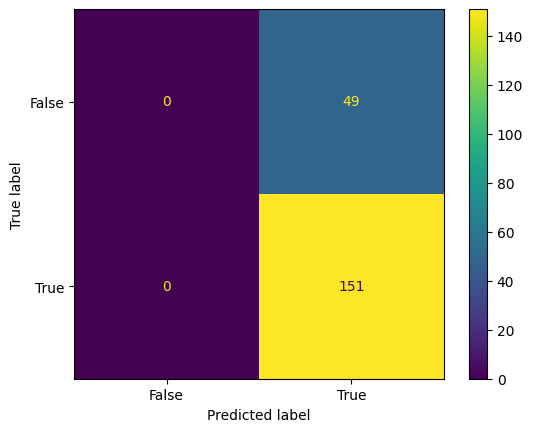

In [ ]:
import matplotlib.pyplot as plt
import numpy
#https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(Y_test['Label'],test_predictions_fastText)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Referensi:
https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

## Metode Glove

Referensi:
https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w06/sentiment.html

https://rifqifai.com/membuat-model-glove-dari-korpus-wikipedia-bahasa-indonesia/

https://yudiwbs.wordpress.com/2018/04/02/glove-untuk-wikipedia-bahasa-indonesia/

https://colab.research.google.com/drive/19Ghc_Q21-k3n4ma8UuoRGXzGFeRN4qKB#scrollTo=XNvMFEolJuSi

https://www.sunnyville.ai/custom-class-glove-embeddings-sklearn-pipeline/

https://bagas.me/spacy-bahasa-indonesia.html

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator
import spacy
nlp = spacy.blank("id")

In [ ]:
class GloveVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([self.nlp(text).vector for text in X])

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

namaFileGlove = "/content/drive/My Drive/Freelance/Project1/sentimen-analysis/glove_50dim_wiki.id.case.text.txt"
glove_file = datapath(namaFileGlove)
tmp_file = get_tmpfile("w2vec_glove_wiki_id.txt")

glove2word2vec(glove_file, tmp_file)



<ipython-input-69-822c7efd48bd>:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, tmp_file)


(370013, 50)

In [ ]:
from gensim.models import KeyedVectors

gloveModel = KeyedVectors.load_word2vec_format(tmp_file, binary=False)
hasil = gloveModel.most_similar("keren")
print("keren:{}".format(hasil))
hasil = gloveModel.most_similar("tempo")

sim = gloveModel.similarity("enak", "bagus")
print("Kedekatan enak-bagus: {}".format(sim))

hasil = gloveModel.most_similar_cosmul(positive=['perempuan', 'raja'], negative=['pria'], topn=1)
print("pria-raja, perempuan-?: {}".format(hasil))


keren:[('ganteng', 0.8041025400161743), ('cowok', 0.751627504825592), ('cuek', 0.7439388632774353), ('jelek', 0.7361395955085754), ('playboy', 0.7273460030555725), ('lucu', 0.7272076606750488), ('tomboy', 0.7236232161521912), ('tampan', 0.7199935913085938), ('ceria', 0.7177116870880127), ('berparas', 0.7041228413581848)]
Kedekatan enak-bagus: 0.6391134262084961
pria-raja, perempuan-?: [('Yehuda', 0.9819594025611877)]


In [ ]:
#vector kata
print("Time taken to train Glove model: " + str(time.time() - start_time))

asc = []
asc.append(gloveModel['bagus'])


Time taken to train Glove model: 95.27887034416199


In [ ]:
asc

[array([ 0.265977, -1.341464,  0.073954, -0.522818, -0.845977,  0.249925,
         0.121332,  0.006968, -0.337282,  0.78084 , -0.084019, -0.863953,
        -0.315393,  0.007037,  0.559867, -0.864738,  0.257238,  0.121249,
         0.348934,  1.295951,  0.118209, -0.193363,  0.245442,  1.043843,
        -0.462266, -0.274951, -0.467002, -0.443176,  0.046497,  0.292746,
        -0.384181,  0.369923,  0.306631,  0.227002,  0.35173 ,  0.104058,
         0.263132, -1.001434, -0.862638,  0.628229, -0.704024,  0.036633,
         0.134928, -0.810588, -0.304734,  0.456933, -0.260829,  1.532229,
         0.951455, -0.04121 ], dtype=float32)]

In [ ]:
stem = []
for i in range (len(X_train['stemming'])):
  for y in range(len(X_train['stemming'][i])):
    stem.append(X_train['stemming'][i][y])

In [ ]:
#Vecotr semua data
for i in stem:
  if i in gloveModel:
    print(np.mean(gloveModel[i]))
  else: print(0)

-0.0037429607
0.02420371
0.011367994
0.012829219
-0.13799502
0.08925047
0.05832386
0.05832386
-0.0037429607
-0.058647715
-0.026369965
-0.0024092803
-0.0037429607
-0.0037429607
-0.09936427
-0.0037429607
-0.05675886
-0.10591949
-0.1800202
0.015302662
-0.015709285
-0.05675886
0
-0.05675886
-0.0037429607
-0.006700537
0.06949538
0.033088684
0.091665566
-0.10591949
-0.013525363
-0.05995686
-0.0037429607
-0.050744675
-0.10591949
-0.10960595
0.05832386
0.0042554014
-0.09936427
0
-0.05675886
0.08925047
-0.006700537
0.06949538
0.061010174
0.007993009
-0.0046356763
-0.13799502
-0.05995686
0.0042554014
-0.0037429607
-0.0037429607
-0.13799502
-0.05995686
0.0042554014
-0.0037429607
-0.10960595
0.02050983
0.060396694
-0.05675886
-0.046955857
0.05730228
0.026126064
0.00779834
0.09310025
-0.05675886
0.0042554014
0.060566805
0
-0.015709285
-0.10591949
0.015302662
-0.10591949
0.07302874
-0.05675886
-0.0037429607
0.07016516
0.02420371
0.018563448
0.12926
0.070495725
-0.0037429607
0.09137836
0.06949538
0.0

In [ ]:
sentences=X_train['stemming']
labels=df=Y_train

In [ ]:
embedding_size = 50

test_feature_glove = np.zeros((len(sentences), embedding_size))
for i, sentence in enumerate(sentences):
    vecs = []
    for word in sentence:
      if word in gloveModel:
        vecs.append(gloveModel[word])
    if vecs:
        vecs = np.array(vecs)
        test_feature_glove[i] = vecs.mean(axis=0)

In [ ]:
clf_decision_glove = svm.LinearSVC()
clf_decision_glove = clf_decision_glove.fit(test_feature_glove, labels['Label'])
#clf_decision_glove = clf_decision_glove.fit(test_features_glove,asc)
test_predictions_glove = clf_decision_glove.predict(test_feature_glove)
print(classification_report(labels['Label'],test_predictions_glove))

              precision    recall  f1-score   support

         0.0       0.74      0.57      0.64       194
         1.0       0.87      0.94      0.90       604

    accuracy                           0.85       798
   macro avg       0.80      0.75      0.77       798
weighted avg       0.84      0.85      0.84       798



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


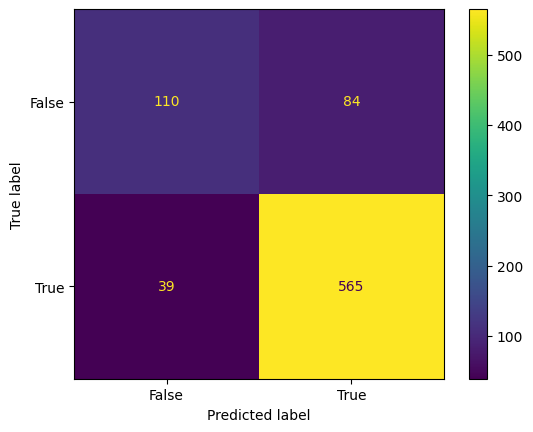

In [ ]:
actual = labels['Label']
predicted = test_predictions_glove

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()